<a href="https://colab.research.google.com/github/chi-hun/dacon/blob/main/%EC%9E%90%EC%9C%A8%EC%A3%BC%ED%96%89_%EC%84%BC%EC%84%9C%EC%9D%98_%EC%95%88%ED%85%8C%EB%82%98_%EC%84%B1%EB%8A%A5_%EC%98%88%EC%B8%A1_AI_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

자율주행 센서의 안테나 성능 예측 AI 경진대회 https://dacon.io/competitions/official/235927/overview/description

# module

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers

# data load

In [2]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

# EDA

In [ ]:
train.info()

In [7]:
train.isna().sum().sum()

0

In [ ]:
test.info()

In [9]:
test.isna().sum().sum()

0

In [12]:
train.shape

(39607, 71)

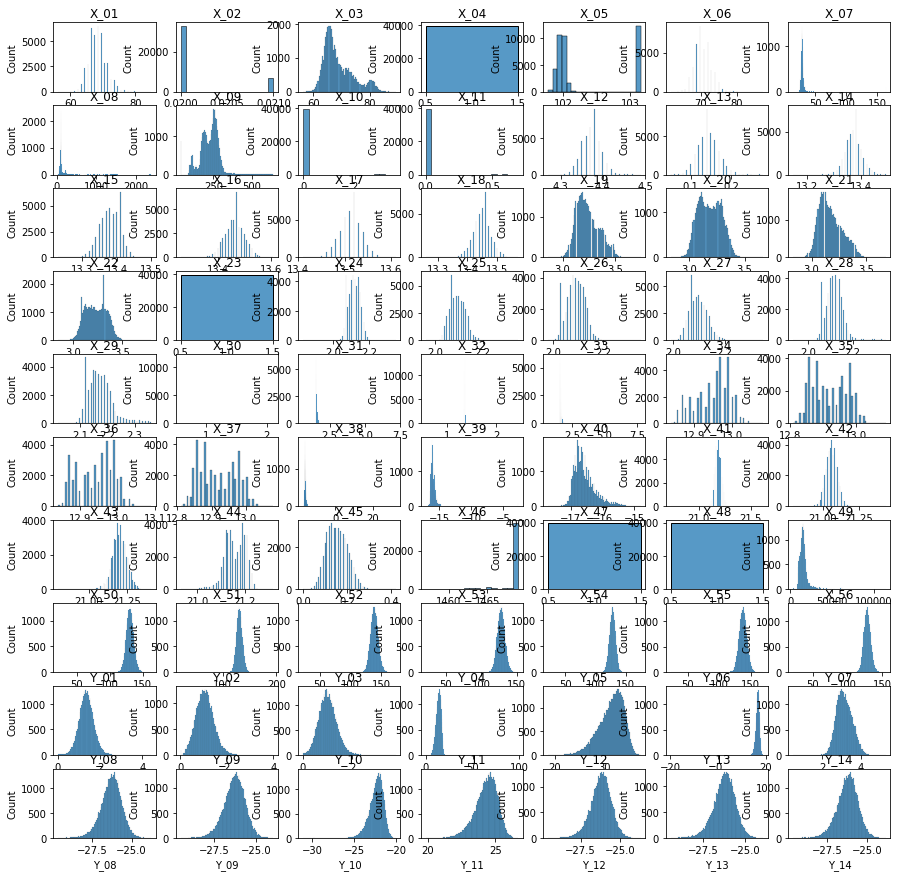

In [41]:
plt.figure(figsize=(15,15))
for i in range(1,71):
    plt.subplot(10,7,i)
    cc = train.columns[i]
    plt.title(cc)
    sns.histplot(train[cc])
plt.show()

In [43]:
train.describe()

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
count,39607.000000,39607.000000,39607.000000,39607.0,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,...,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000
mean,68.412040,103.320166,68.826354,1.0,102.337203,70.597211,29.407490,164.449320,225.397470,0.002449,...,31.290467,16.529382,3.155054,-26.294839,-26.308623,-22.400062,24.325061,-26.237762,-26.233869,-26.245868
std,2.655983,0.000372,5.151167,0.0,0.548353,2.259820,7.338204,220.402444,66.734725,0.086255,...,2.543222,1.893014,0.418940,0.660537,0.653580,0.920952,0.830197,0.656329,0.655090,0.655989
min,56.268000,103.320000,56.470000,1.0,101.774000,61.726000,14.140000,38.460000,37.580000,0.000000,...,18.589000,-19.963000,0.502000,-29.652000,-29.523000,-31.119000,19.844000,-29.544000,-29.448000,-29.620000
25%,66.465000,103.320000,65.070000,1.0,101.949000,68.864000,27.890000,105.990000,188.540000,0.000000,...,29.768000,16.146000,2.863000,-26.689000,-26.702000,-22.871000,23.836000,-26.630000,-26.624000,-26.640000
50%,68.504000,103.320000,67.270000,1.0,102.006000,69.884000,28.840000,115.040000,234.450000,0.000000,...,31.710000,16.694000,3.126000,-26.254000,-26.266000,-22.275000,24.420000,-26.198000,-26.193000,-26.204000
75%,69.524000,103.320000,71.770000,1.0,103.144000,71.923000,29.870000,132.620000,263.960000,0.000000,...,33.184000,17.164000,3.433500,-25.855000,-25.871000,-21.791000,24.911500,-25.799000,-25.794000,-25.809000
max,84.820000,103.321000,89.170000,1.0,103.160000,87.219000,163.860000,2387.440000,637.490000,3.600000,...,37.250000,18.998000,5.299000,-23.785000,-23.960000,-20.052000,26.703000,-23.722000,-23.899000,-23.856000


In [47]:
test.describe()

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
count,39608.000000,39608.000000,39608.000000,39608.0,39608.000000,39608.000000,39608.000000,39608.000000,39608.000000,39608.000000,...,39608.0,39608.0,39608.000000,39608.000000,39608.000000,39608.000000,39608.000000,39608.000000,39608.000000,39608.000000
mean,68.396003,103.320164,68.837921,1.0,102.337295,70.584656,29.465362,163.372693,225.199662,0.002560,...,1.0,1.0,16659.687707,130.792771,131.506077,138.619585,128.012468,128.024288,137.897399,128.479544
std,2.663089,0.000370,5.205770,0.0,0.547959,2.250952,7.869169,219.287019,66.266169,0.088746,...,0.0,0.0,8725.413782,6.283461,6.248113,6.711747,6.022616,5.783733,6.825189,5.766703
min,53.209000,103.320000,55.570000,1.0,101.734000,61.726000,13.390000,28.590000,37.580000,0.000000,...,1.0,1.0,2894.030000,21.800000,21.910000,23.100000,21.330000,21.340000,22.980000,21.410000
25%,66.465000,103.320000,65.070000,1.0,101.950000,68.864000,27.900000,105.760000,188.410000,0.000000,...,1.0,1.0,13021.355000,127.007745,127.715514,134.507082,124.397173,124.726521,133.703757,125.172442
50%,68.504000,103.320000,67.270000,1.0,102.007000,69.884000,28.840000,115.040000,234.890000,0.000000,...,1.0,1.0,15252.580000,130.748868,131.460499,138.622976,128.048022,128.136952,137.892594,128.468109
75%,69.524000,103.320000,71.770000,1.0,103.144000,71.923000,29.880000,131.102500,263.990000,0.000000,...,1.0,1.0,17540.655000,134.562718,135.301195,142.792608,131.706046,131.502206,142.087140,131.889357
max,86.859000,103.321000,88.670000,1.0,103.161000,87.219000,163.860000,2387.440000,637.540000,3.500000,...,1.0,1.0,149599.930000,162.657956,161.207806,177.616739,169.774016,169.065281,169.452855,159.642590


In [14]:
x, y = [],[]
for i in train.columns:
    if i[0] == 'X':
        x.append(i)
    elif i[0] == 'Y':
        y.append(i)
print(x)
print(y)

['X_01', 'X_02', 'X_03', 'X_04', 'X_05', 'X_06', 'X_07', 'X_08', 'X_09', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15', 'X_16', 'X_17', 'X_18', 'X_19', 'X_20', 'X_21', 'X_22', 'X_23', 'X_24', 'X_25', 'X_26', 'X_27', 'X_28', 'X_29', 'X_30', 'X_31', 'X_32', 'X_33', 'X_34', 'X_35', 'X_36', 'X_37', 'X_38', 'X_39', 'X_40', 'X_41', 'X_42', 'X_43', 'X_44', 'X_45', 'X_46', 'X_47', 'X_48', 'X_49', 'X_50', 'X_51', 'X_52', 'X_53', 'X_54', 'X_55', 'X_56']
['Y_01', 'Y_02', 'Y_03', 'Y_04', 'Y_05', 'Y_06', 'Y_07', 'Y_08', 'Y_09', 'Y_10', 'Y_11', 'Y_12', 'Y_13', 'Y_14']


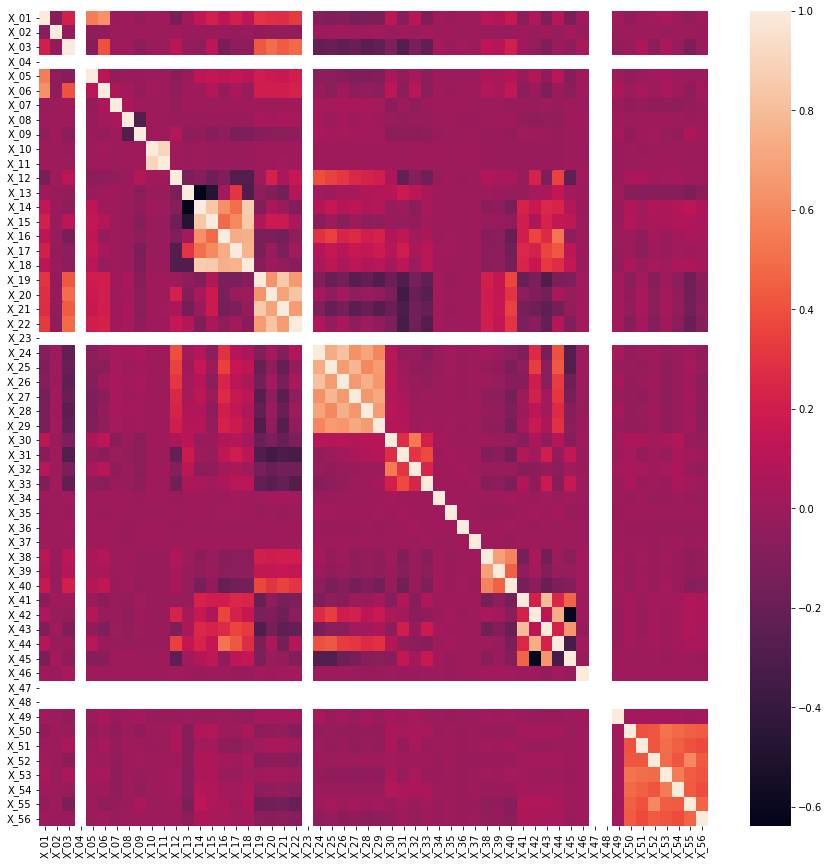

In [71]:
plt.figure(figsize=(15,15))
cc = train[x].corr()
sns.heatmap(cc)
plt.show()

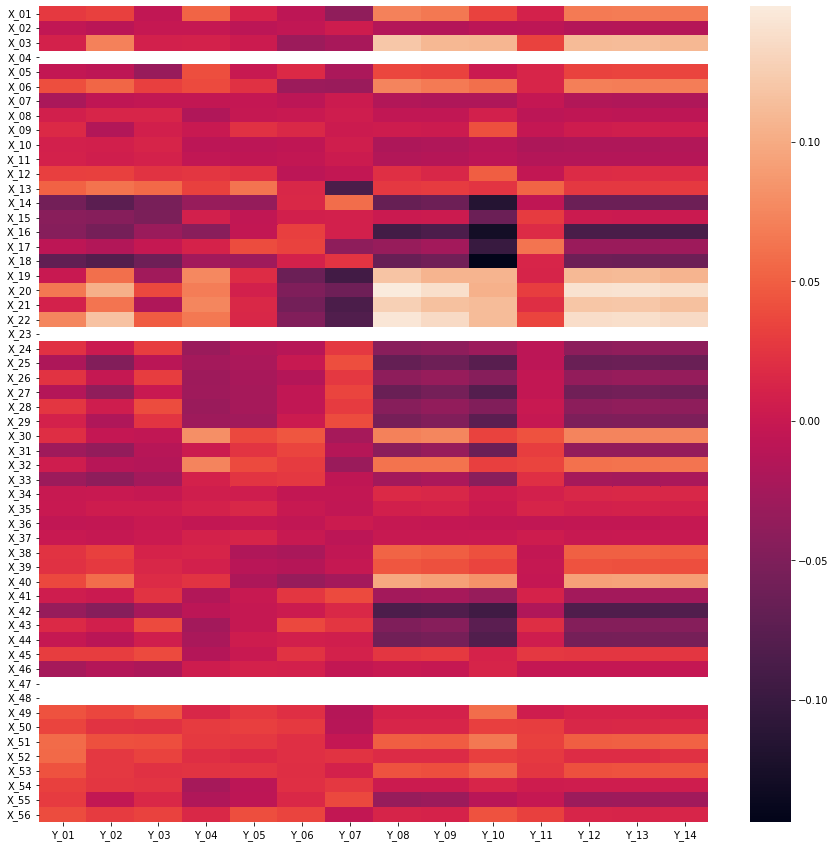

In [69]:
plt.figure(figsize=(15,15))
cc = pd.DataFrame()
for i in range(len(y)):
    cc_0 = pd.concat([train[x],train[y[i]]], axis=1)
    ccc_0 = cc_0.corr()[y[i]][:-1]
    cc = pd.concat([cc,ccc_0],axis=1)

sns.heatmap(cc)
plt.show()

In [123]:
x_train = train[x].drop(['X_04','X_23','X_47','X_48'], axis=1)
y_train = train[y]
x_test = test.drop(['ID','X_04','X_23','X_47','X_48'], axis=1)

In [78]:
x_train.shape, x_test.shape, y_train.shape

((39607, 52), (39608, 52), (39607, 14))

In [124]:
sds, mms = StandardScaler(), MinMaxScaler()
for i in x_train.columns:
    x_train[i] = sds.fit_transform(x_train[[i]])
    x_test[i] = sds.transform(x_test[[i]])
    x_train[i] = mms.fit_transform(x_train[[i]])
    x_test[i] = mms.transform(x_test[[i]])

# modeling

In [162]:
x_train = np.array(x_train).reshape(-1,4,13,1)
x_test = np.array(x_test).reshape(-1,4,13,1)

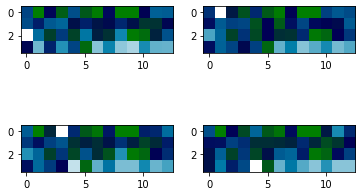

In [90]:
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(x_train[i].reshape(4,13), cmap='ocean')
plt.show()

In [109]:
def model_make1():
    inputs = layers.Input(shape=(4,13,1))
    x = layers.Conv2D(32,1,1,padding='same',activation='relu')(inputs)
    x = layers.Conv2D(64,1,1,padding='same',activation='relu')(x)
    x = layers.Conv2D(128,1,1,padding='same',activation='relu')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128,activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(64,activation='relu')(x)
    outputs = layers.Dense(14)(x)

    model = tf.keras.Model(inputs, outputs)
    return model

In [163]:
def model_make2():
    inputs = layers.Input(shape=(4,13,1))
    x = layers.Conv2D(32,1,1,padding='same',activation='relu')(inputs)
    x = layers.Conv2D(64,1,1,padding='same',activation='relu')(x)
    x = layers.Conv2D(128,1,1,padding='same',activation='relu')(x)
    x = layers.Conv2D(256,1,1,padding='same',activation='relu')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(256,activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(128,activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(64,activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(14)(x)

    model = tf.keras.Model(inputs, outputs)
    return model

In [164]:
model = model_make1()
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 4, 13, 1)]        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 13, 32)         64        
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 13, 64)         2112      
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 13, 128)        8320      
                                                                 
 flatten_2 (Flatten)         (None, 6656)              0         
                                                                 
 dense_41 (Dense)            (None, 128)               852096    
                                                                 
 dropout_30 (Dropout)        (None, 128)               0   

In [165]:
model.compile(optimizer='adam', loss='mse')

In [178]:
his = model.fit(x_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
991/991 [==============================] - 19s 19ms/step - loss: 1.6105 - val_loss: 4.8401
Epoch 2/20
991/991 [==============================] - 18s 18ms/step - loss: 1.6088 - val_loss: 5.0429
Epoch 3/20
991/991 [==============================] - 17s 17ms/step - loss: 1.6060 - val_loss: 5.1349
Epoch 4/20
991/991 [==============================] - 17s 17ms/step - loss: 1.6079 - val_loss: 4.6824
Epoch 5/20
991/991 [==============================] - 17s 17ms/step - loss: 1.6069 - val_loss: 4.8507
Epoch 6/20
991/991 [==============================] - 17s 17ms/step - loss: 1.6090 - val_loss: 4.8901
Epoch 7/20
991/991 [==============================] - 17s 18ms/step - loss: 1.6067 - val_loss: 5.4535
Epoch 8/20
991/991 [==============================] - 17s 17ms/step - loss: 1.6067 - val_loss: 4.9317
Epoch 9/20
991/991 [==============================] - 18s 18ms/step - loss: 1.6062 - val_loss: 5.2472
Epoch 10/20
991/991 [==============================] - 17s 17ms/step - loss: 1.605

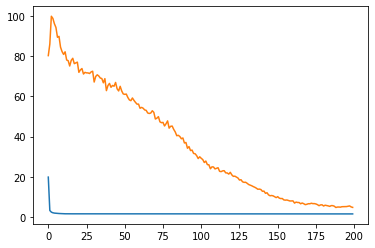

In [167]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.show()

In [179]:
pre = model.predict(x_test)

In [170]:
pre[0:2]

array([[  1.2131217,   1.1465364,   0.978947 ,  12.039559 ,  27.886415 ,
         14.794317 ,   3.161644 , -24.101706 , -24.218409 , -20.47224  ,
         22.345171 , -24.225542 , -24.000584 , -24.135609 ],
       [  1.2128212,   1.1456448,   0.9787943,  12.031489 ,  27.883186 ,
         14.793779 ,   3.1611269, -24.10373  , -24.21987  , -20.47366  ,
         22.343351 , -24.225653 , -24.002499 , -24.136196 ]],
      dtype=float32)

In [99]:
pre.shape

(39608, 14)

In [171]:
sub = pd.read_csv('/content/sample_submission.csv')
sub.shape

(39608, 15)

In [180]:
a = 0
for i in sub.columns[1:]:
    sub[i] = pre.T[a]
    a += 1

In [182]:
sub.to_csv('sub.csv', index=False)

# modeling2

In [136]:
def model_make2():
    inputs = layers.Input(shape=(52))
    x = layers.Dense(32,activation='relu')(inputs)
    x = layers.Dropout(0.1)(x)
    x = layers.Dense(64,activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    x = layers.Dense(128,activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    x = layers.Dense(256,activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    x = layers.Dense(512,activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    x = layers.Dense(1024,activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    x = layers.Dense(64,activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(14)(x)
    
    model = tf.keras.Model(inputs, outputs)
    return model

In [137]:
model = model_make2()
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 52)]              0         
                                                                 
 dense_33 (Dense)            (None, 32)                1696      
                                                                 
 dropout_23 (Dropout)        (None, 32)                0         
                                                                 
 dense_34 (Dense)            (None, 64)                2112      
                                                                 
 dropout_24 (Dropout)        (None, 64)                0         
                                                                 
 dense_35 (Dense)            (None, 128)               8320      
                                                                 
 dropout_25 (Dropout)        (None, 128)               0   

In [138]:
model.compile(optimizer='adam', loss='mse')

In [141]:
his = model.fit(x_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
991/991 [==============================] - 20s 20ms/step - loss: 5.7497 - val_loss: 1.2807
Epoch 2/50
991/991 [==============================] - 19s 19ms/step - loss: 5.3788 - val_loss: 1.2324
Epoch 3/50
991/991 [==============================] - 18s 18ms/step - loss: 5.0625 - val_loss: 1.3413
Epoch 4/50
991/991 [==============================] - 18s 18ms/step - loss: 4.7218 - val_loss: 1.3365
Epoch 5/50
991/991 [==============================] - 17s 17ms/step - loss: 4.4165 - val_loss: 1.2843
Epoch 6/50
991/991 [==============================] - 17s 17ms/step - loss: 4.1463 - val_loss: 1.4381
Epoch 7/50
991/991 [==============================] - 17s 18ms/step - loss: 3.8896 - val_loss: 1.3076
Epoch 8/50
991/991 [==============================] - 18s 18ms/step - loss: 3.6195 - val_loss: 1.3631
Epoch 9/50
991/991 [==============================] - 18s 19ms/step - loss: 3.4208 - val_loss: 1.2090
Epoch 10/50
991/991 [==============================] - 18s 18ms/step - loss: 3.200

In [158]:
pre = model.predict(x_test)

In [152]:
sub = pd.read_csv('/content/sample_submission.csv')
a = 0
for i in sub.columns[1:]:
    sub[i] = pre.T[a]
    a += 1
sub.to_csv('sub.csv', index=False)